<a href="https://colab.research.google.com/github/clacri/iucr2020_compschool/blob/main/Networkx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install biopython

     |████████████████████████████████| 2.3 MB 7.1 MB/s 


In [ ]:
import pandas as pd
import numpy as np
import scipy as sp
import networkx as nx
from IPython.display import Image
import matplotlib.pyplot as plt

NewtorkX is a python library completely written in Python that allow to create, manage, inspect graph networx.
https://networkx.org/documentation/stable/index.html

In [ ]:
nx.__version__

'2.6.2'

A graph is a pair G=(V,E) of two sets. 
V is the set of **vertices** (also called **nodes**) and E is the set of tuples corresponding to the **edges** (also called **links**) that connect two vertices.

Let V be a finite set, and denote by:

$E = ((u, v) | u, v ∈ V, u \neq v)$

A pair $G = (V, E)$ with $E ⊆ E(V)$ is called a graph (on V). 

A graph can be visualised as a collection of nodes (circles) that are connected to each others (line segments).  

If we allow edges $(u, u) | u ∈ V$ then those edges are **loops**

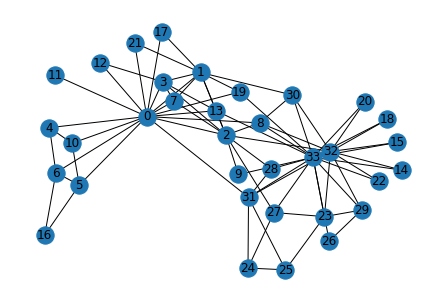

In [ ]:
def draw_graph(g, path=None, typeg="spring"):
  # Find key-values for the graph
  if typeg == "circular":
      pos = nx.circular_layout(g)
  else:
      pos = nx.spring_layout(g)
  # Plot the graph
  if path is None:
    nx.draw(g, cmap = plt.get_cmap('rainbow'), with_labels=True, pos=pos)
  else:
    colors = ["red" if (i, j) in path else "black" for (i,j) in g.edges]
    widths = [5 if (i, j) in path else 1 for (i,j) in g.edges]
    #for (i, j) in g.edges: print(i,j, (i,j) in path)
    nx.draw(g, edge_color=colors, width=widths, pos=pos, with_labels=True)

# Load the graph
G_karate = nx.karate_club_graph()
draw_graph(G_karate)

An edge can be **directed** or **undirected**. A graph can only have all directed edges, named **Directed Graph** or all undirected edges, named **Undirected Graph**. 

**Directed**: Ordered pair of vertices. Represented as (u, v) directed from vertex u to v.

**Undirected**: Unordered pair of vertices. Represented as {u, v}. Disregards any sense of direction and treats both end vertices interchangeably.



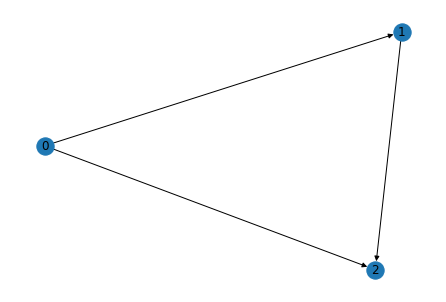

In [ ]:
a = nx.DiGraph([(0,1),(1,2),(0,2)])
draw_graph(a)

In [ ]:
print(a.edges)

[(0, 1), (0, 2), (1, 2)]


In [ ]:
print(a.nodes)

[0, 1, 2]


In [ ]:
(1, 0) in a.edges

False

In [ ]:
(0, 1) in a.edges

True

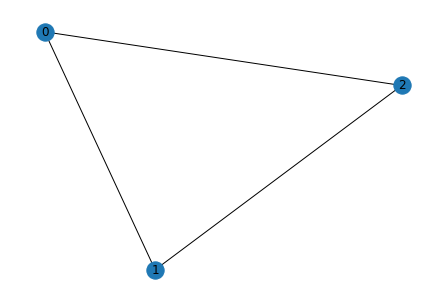

In [ ]:
a = nx.Graph([(0,1),(1,2),(0,2)])
draw_graph(a)

In [ ]:
(0, 1) in a.edges, (1, 0) in a.edges

(True, True)

A graph is **simple** if there are not **loop** edges

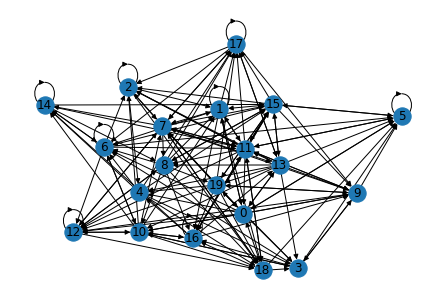

In [ ]:
q = nx.DiGraph(tuple(np.random.choice(np.arange(20),size=(200,2)))) #we need to cast in tuple otherwise nx will look for an Adjancency Matrix
draw_graph(q)

In [ ]:
for e in q.edges:
  if e[0] == e[1]: 
    print(" Graph is not simple", e)

 Graph is not simple (12, 12)
 Graph is not simple (16, 16)
 Graph is not simple (6, 6)
 Graph is not simple (14, 14)
 Graph is not simple (2, 2)
 Graph is not simple (17, 17)
 Graph is not simple (5, 5)
 Graph is not simple (1, 1)


A **Path** of length n (> 0) from u to v in G is a sequence of n edges $e_1, e_2 , e_3, …, e_n$ of G such that $f(e_1) = (x_0, x_1), f(e_2) = (x_1, x_2), …, f(e_n) = (x_{n-1}, x_n)$
where $x_0 = u$ and $x_n = v$.

A path is said to **pass through** $x_0, x_1, …, x_n$  or **traverse** $e_1, e_2 , e_3, …, e_n$

A **simple path** is a path that does not contain any **cycles**. In other words it must not contain the same edge multiple times.


In [ ]:
#Find all simple paths in the Graph between two vertices
#R. Sedgewick, “Algorithms in C, Part 5: Graph Algorithms”, Addison Wesley Professional, 3rd ed., 2001.
#nx.all_simple_paths(q, 3, 8) #returns a generator this might be very slow as the combinations of all possible paths might be very large

nx.shortest_path(q, 3, 15) #this is fast as it does not need to generate all the possible combinations

[3, 16, 15]

In [ ]:
paths = nx.all_simple_paths(q, source=3, target=8, cutoff=3)
>>> print(list(paths))

[[3, 5, 15, 8], [3, 5, 11, 8], [3, 16, 11, 8], [3, 16, 14, 8], [3, 16, 15, 8], [3, 16, 13, 8], [3, 6, 11, 8], [3, 6, 14, 8], [3, 6, 12, 8], [3, 10, 14, 8], [3, 10, 12, 8], [3, 10, 7, 8], [3, 9, 11, 8], [3, 9, 7, 8]]


**Excercise 1:** Generate the list of pairs that would describe a simple of path of size 4 in the randomly created graph q.

A graph can be described and stored by converting it into a list or a matrix:

**Incidence (Matrix)**: Most useful when information about edges is more desirable than information about vertices.

**Adjacency (Matrix/List)**: Most useful when information about the vertices is more desirable than information about the edges. 

$G = (V, E)$ be a graph. Suppose that $v_1, v_2, v_3, …, v_n$ are the vertices. Then the adjacency matrix is the $n \times n$ matrix $M = [a_{ij}]$, where

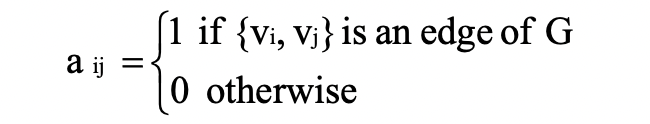

In [ ]:
for line in nx.generate_adjlist(q):
  print(line)

0 19 6 3 5 13 4 10 12 7 9 1
19 7 9 4 16 15 17 0 12 3 2 18
13 10 2 17 4 5 11 9 0 19 3 8 15
10 2 6 18 1 14 9 12 16 7 3
12 18 12 8 7 9 10
18 16 0 7 5 11 3
7 11 18 14 0 17 8 15 13 12
11 12 17 15 18 7 1 8 16 2 0 9 5
16 11 14 10 15 4 9 13 16
4 6 17 14 3 15 12 18
6 10 11 5 14 2 12 1 6
9 19 5 11 3 7
14 14 15 8 6 11
15 13 9 11 2 17 8 5 19 16 1 6
2 18 2 1 11 4 7
17 2 7 17 9 13 6
3 5 16 6 10 9
5 15 5 11 0
1 11 17 18 0 7 16 1
8 1 10 18 16 17 12 19 6 15


In [ ]:
nx.linalg.graphmatrix.adjacency_matrix(q)

<20x20 sparse matrix of type '<class 'numpy.longlong'>'
	with 158 stored elements in Compressed Sparse Row format>

In [ ]:
nx.linalg.graphmatrix.adjacency_matrix(q).toarray()

array([[0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0],
       [1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0],
       [1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1],
       [0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0],
       [0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0],
       [1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1],
       [1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1],
       [0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0],
       [0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0],
       [0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1],
       [0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1],
       [0, 0, 0, 0, 0, 1, 1, 1, 0,

**Excercise 2:** Given an adjacency matrix identify how many loops there are and list them.

**Excercise 3:** Given an adjacency matrix as numpy array detect if the Graph represented is Directed or Unidrected

The adjacency matrix will vary according the order of the nodes. Networkx, by default, use the internal sorting represented by the iterator ```G.nodes()```

For each node is possible to compute its **degree** as the number of edges that connect that vertex.

When the graph is directed we can also distinguish the **in_degree**, the number of edges that *ends* at that vertex, from the **out_degree** as the number of edges that *starts* from that vertex.

A node with degree 0 is an **isolated** node.

A node with a loop will have a degree >= 2:

### The handshaking Theorem ###
$2e = \sum_{\substack{v \in V}} deg(v) $

In [ ]:
2*len(q.edges()) == sum([q.degree[v] for v in q.nodes()])

True

In [ ]:
2*len(q.edges())

316

**Theorem**: An undirected graph has even number of vertices with odd degree

**Excercise 4:** Give a simple draft for a proof  

- *Hamiltonian Paths*
- Shortest Path - Dikijstra
- Spectrum -- Eigenvalue, Eigen vectors
- Bipartite graphs
- Directed Acyclic Graphs
- Connecticity. Strongly connected components
- Traverse: BFS and DFS
- Trees: Spanning Tree, Search Trees etc...
- Ismorphisms
- Community Clustering


**Hamiltonian path** (also called traceable path) is a path that visits each vertex exactly once.

A **Hamiltonian cycle** (also called Hamiltonian circuit, vertex tour or graph cycle) is a cycle that visits each vertex exactly once (except for the starting vertex, which is visited once at the start and once again at the end).

A graph that contains a Hamiltonian path is called a **traceable graph**. A graph that contains a Hamiltonian cycle is called a **Hamiltonian graph**. 

Any Hamiltonian cycle can be converted to a Hamiltonian path by removing one of its edges, but a Hamiltonian path can be extended to Hamiltonian cycle only if its endpoints are adjacent.


In [ ]:
if not nx.algorithms.tournament.is_tournament(q):
  q = nx.algorithms.tournament.random_tournament(10)

r = nx.algorithms.tournament.hamiltonian_path(q)
print(r)
r = [(r[i], r[i+1]) for i in range(len(r)-1)]
print(r)

[0, 2, 3, 1, 6, 8, 4, 9, 7, 5]
[(0, 2), (2, 3), (3, 1), (1, 6), (6, 8), (8, 4), (4, 9), (9, 7), (7, 5)]


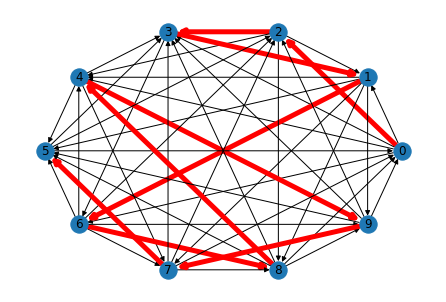

In [ ]:
draw_graph(q, path=r, typeg="circular")

**Shortest path: from single root**

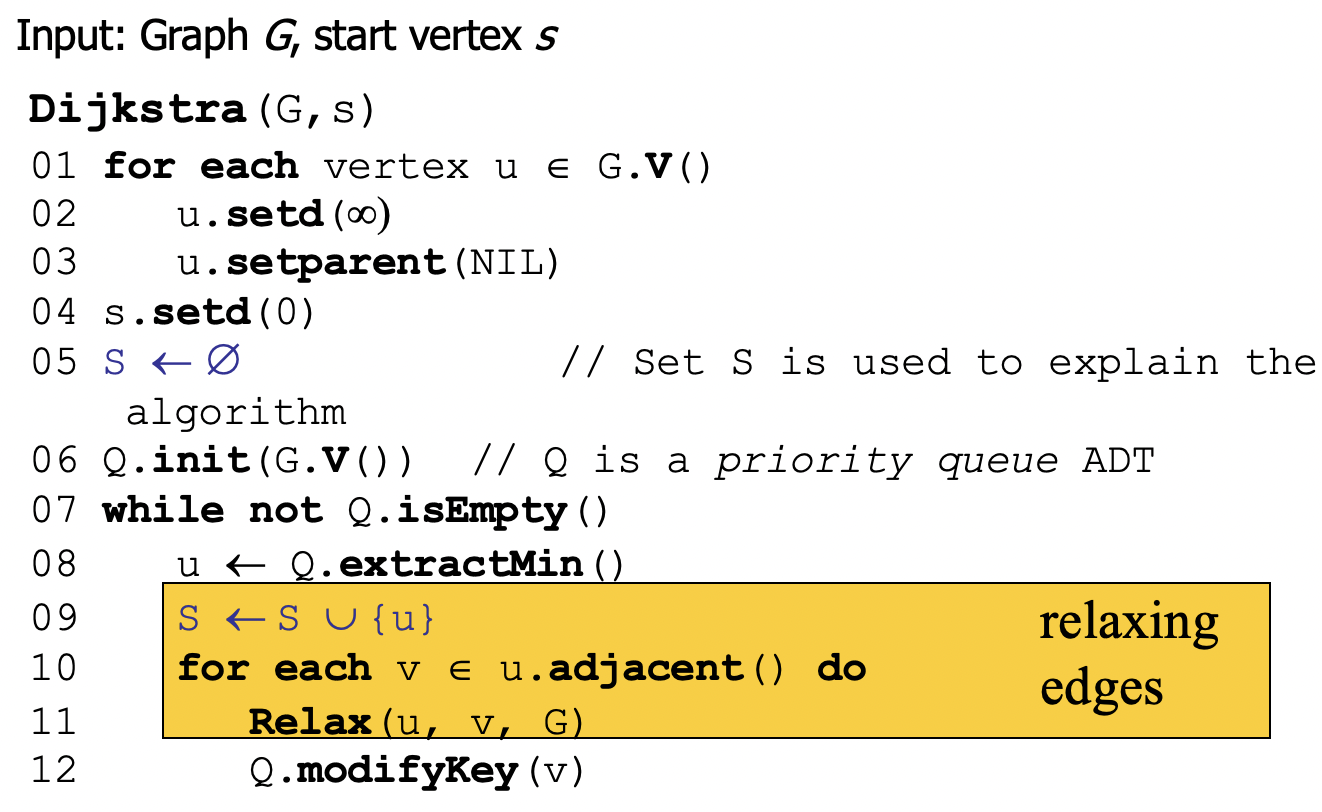

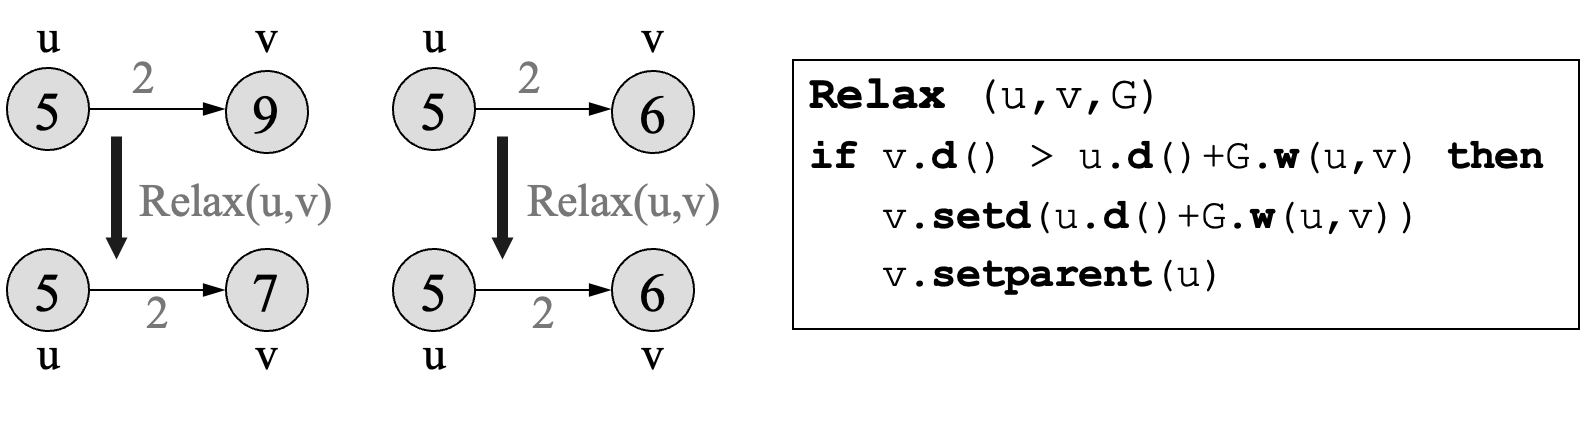

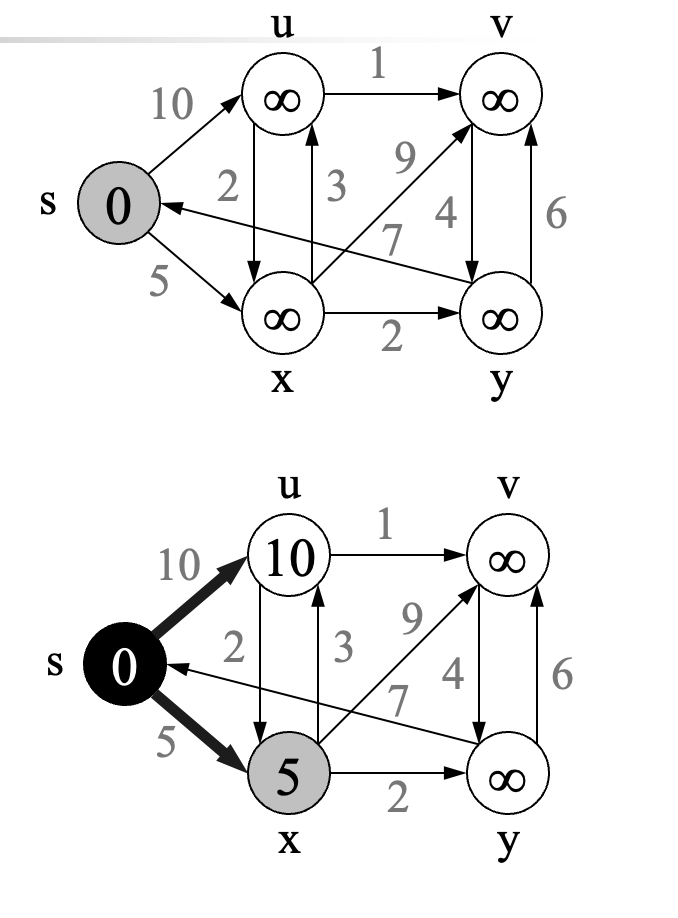


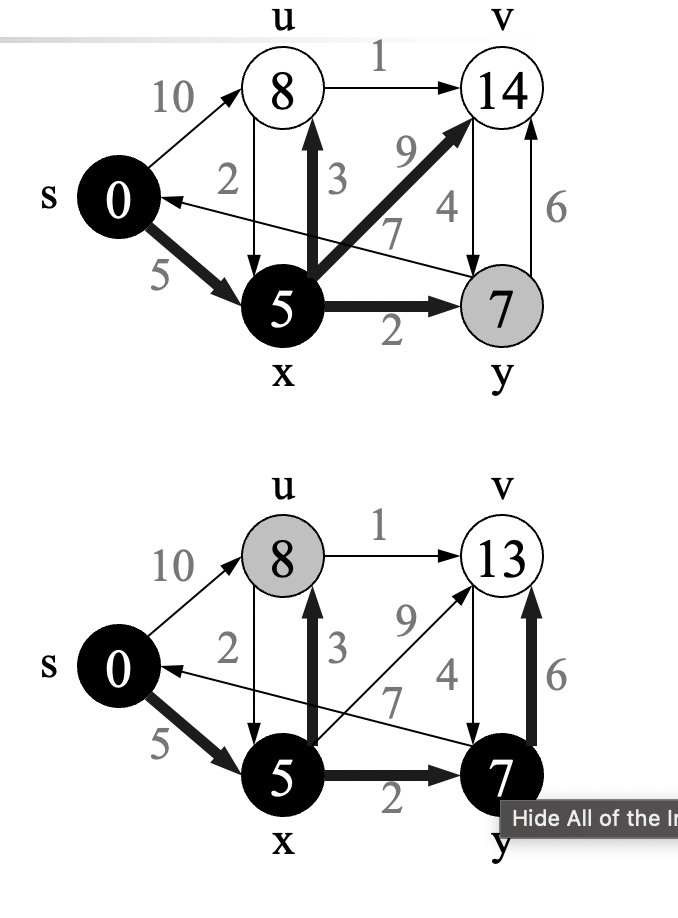

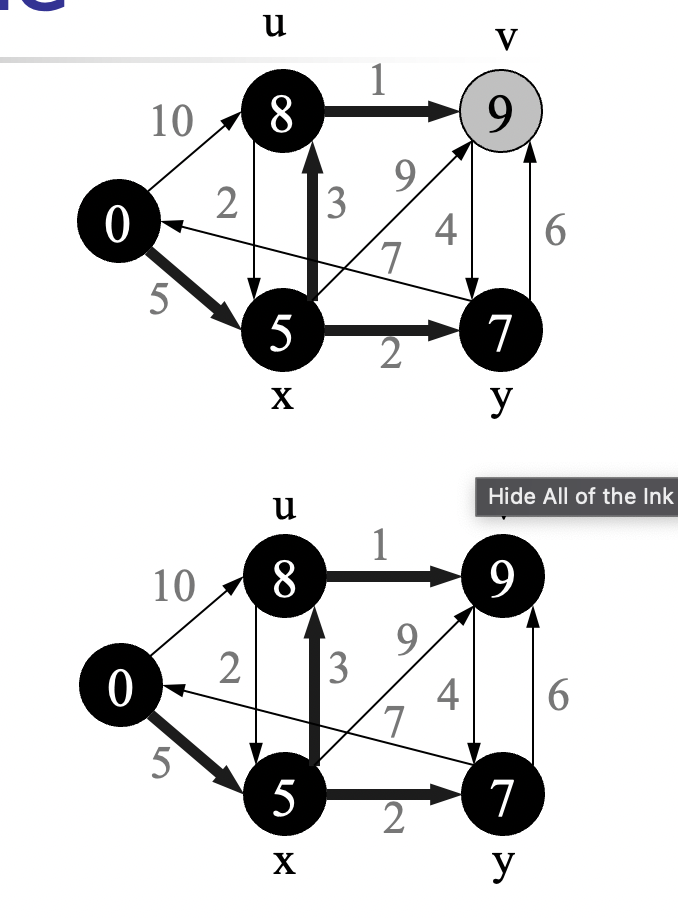

[0, 1, 9]
[(0, 1), (1, 9)]


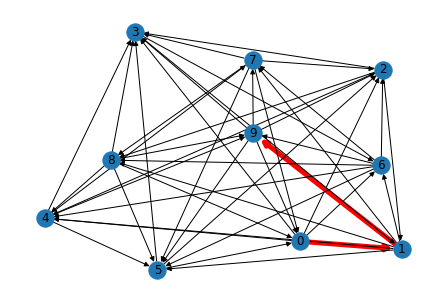

In [ ]:
r = nx.algorithms.shortest_paths.generic.shortest_path(q, source=0, target=9)
print(r)
r = [(r[i], r[i+1]) for i in range(len(r)-1)]
print(r)
draw_graph(q, path=r, typeg='spring')

In [ ]:
list(nx.algorithms.shortest_paths.generic.all_shortest_paths(q, source=0, target=1))

[[0, 1]]

# Working with a graph of a protein structure

In [ ]:
import requests
import io
import Bio.PDB

url = r'https://alphafold.ebi.ac.uk/files/'
pdbid = r'AF-Q5VSL9-F1-model_v1.pdb'
name = 'AF-Q5VSL9-F1'

r = requests.get(url+pdbid, allow_redirects=True)
pdbtext = io.StringIO(r.content.decode("utf-8"))

parser = Bio.PDB.PDBParser()
structure = parser.get_structure(name, pdbtext)

G = nx.Graph() #undirected
for model in structure:
  for chain in model:
    for residue in chain:
      if residue.has_id("CA"):
        G.add_node(str(residue.get_id()[1])+residue.get_id()[2],
                   label=str(residue.get_id()[1])+residue.get_id()[2]+residue.get_resname(), 
                   resname=residue.get_resname(),
                   x=residue["CA"].get_coord()[0],
                   y=residue["CA"].get_coord()[1],
                   z=residue["CA"].get_coord()[2],
                   lddt=residue["CA"].get_bfactor(), 
                   full_id=residue.get_full_id(),
                   obj=residue["CA"])

edges = []
weights = {}
for a,node1 in enumerate(G.nodes):
    for b,node2 in enumerate(G.nodes):
      if b>a:
        edges.append((node1, node2))
        weights[(node1, node2)] = G.nodes[node1]["obj"]-G.nodes[node2]["obj"]
        #G.add_edge(node1, node2, weight=G.nodes[node1]["obj"]-G.nodes[node2]["obj"])

G.add_edges_from(edges, weight=weights)
nx.set_edge_attributes(G, values = weights, name = 'weight')

print(G)



Graph with 837 nodes and 349866 edges


In [ ]:
(837*(837-1))/2 #A complete graph has n(n-1)/2 edges

349866.0

In [ ]:
#The following code is too slow and potentially can fill your RAM. Do not run it

# z = 0
# for e in G.edges:
#   if z>10: break
#   print(G.edges[e])
#   z += 1

In [ ]:
print(weights[('40 ', '43 ')])
print(G['40 ']['43 ']["weight"])
print(type(G['40 ']['43 ']["weight"]))

10.047276
10.047276
<class 'numpy.float32'>


In [ ]:
#Subgraph by distance lower than 4 A
S = G.edge_subgraph([(n1, n2) for n1, n2, w in G.edges(data="weight") if w < 4]).copy()
print(S)

Graph with 837 nodes and 837 edges


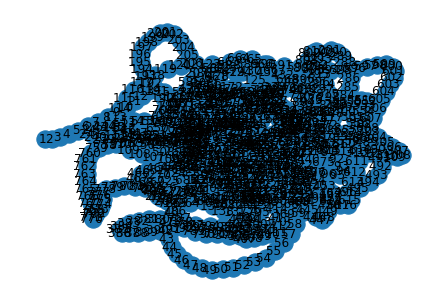

In [ ]:
draw_graph(S)


In [ ]:
def plot_degree_and_hist(g):
  degrees = g.degree() # dictionary node:degree 
  values = list(dict(degrees).values())
  nodes = list(range(g.number_of_nodes()))

  plt.figure()
  plt.xlabel('Degree')
  plt.ylabel('Number of nodes')
  plt.title('Structure connection per residue: Histogram frequencies')
  plt.hist(values)
  plt.figure()
  plt.xlabel('Node')
  plt.ylabel('Degree')
  plt.title('Structure connection per residue: Degrees distribution')
  plt.scatter(nodes, values)


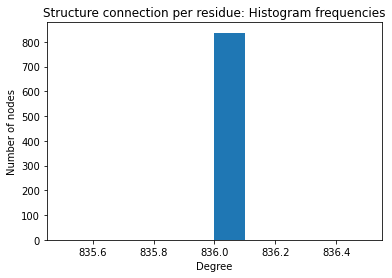

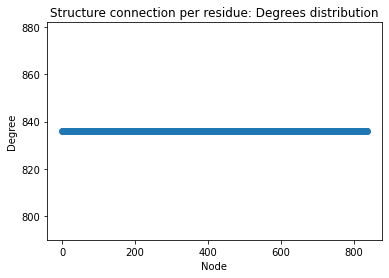

In [ ]:
plot_degree_and_hist(G) # Complete graph


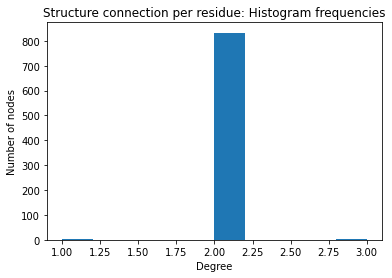

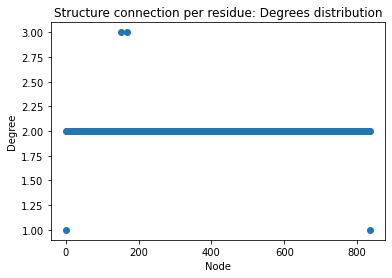

In [ ]:
plot_degree_and_hist(S)

Graph with 837 nodes and 45951 edges


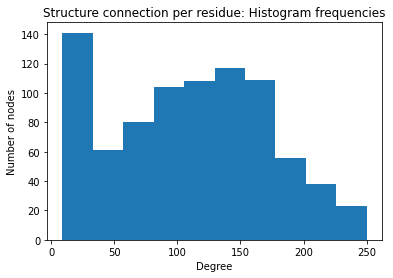

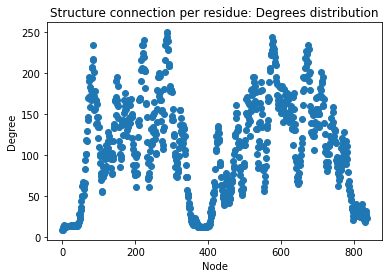

In [ ]:
#Subgraph by distance lower than 22 A
H = G.edge_subgraph([(n1, n2) for n1, n2, w in G.edges(data="weight") if w < 22]).copy()
print(H)
plot_degree_and_hist(H)

**Excercise 5: What you can infer for residues represented by the points with x~400?**